In [1]:
#dependencies
#data processing
import numpy as np 
import pandas as pd 
import xlrd

# visualizaion
import matplotlib.pyplot as plt 
import seaborn as sns 

# display graphs inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../titanic_data/titanic3.xls')
df.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   pclass       1309 non-null   int64  
 2   survived     1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


### Missing Values from the train dataset

* Age,Cabin,Fare and Embarked are the columns for missing values. We will work on imputing missing field data

In [4]:
df.describe()

,passengerid,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


* We see the average Age of the passengers is 29.88

### Feature Engineering

* Name - categorize passengers through the titles in the name to see is there is any relationship between name and survival

In [5]:
#grab the tittle from passenger name
def title(name):
    start = name.find(',')
    end = name.find('.')
    return name[start+2:end]


df['Title'] = df.name.map(title)

#show title count by sex
pd.crosstab(df.sex,df.Title)

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [6]:
# Titles with very low cell counts to be combined to "rare" level

rare_title = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
df.loc[:,"Title"] = df["Title"].map(lambda x: x if x not in rare_title else 'Rare_Title')
df.loc[df.Title == 'Mlle',"Title"] = 'Miss'
df.loc[df.Title == 'Ms',"Title"] = 'Miss'
df.loc[df.Title == 'Mme',"Title"] = 'Mrs'

# Show title counts by sex again
Title_df = pd.crosstab(df.sex,df.Title)
Title_df

Title,Master,Miss,Mr,Mrs,Rare_Title
sex,,,,,
female,0,264,0,198,4
male,61,0,757,0,25


In [7]:
df.head(1)

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss


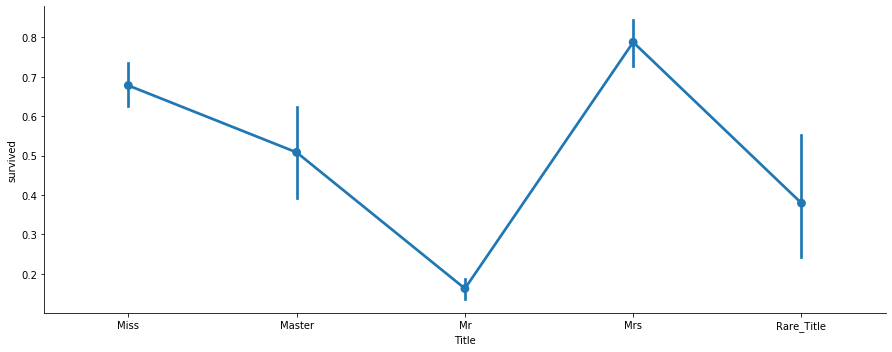

In [9]:
ax = sns.factorplot(x='Title',y='survived', data=df , aspect = 2.5, )
plt.savefig('../img/TitleSurvived')
plt.show()

# x ='size', y ='tip',  hue = 'sex', data = df

### SibSp and Parch:

* SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that shows if someone is not alone.

In [10]:
data = [df]

for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype('int64')

df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

In [11]:
df.head(1)

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,relatives,not_alone
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,0,1


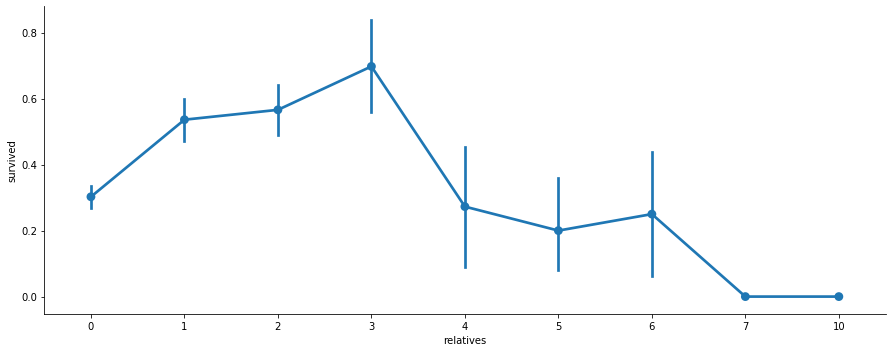

In [12]:
axes = sns.factorplot('relatives','survived', 
                      data=df, aspect = 2.5, )


plt.savefig('../img/FamilySizeAndSurvival.jpg')
plt.show()

* Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

* We can see that there’s a survival penalty to singletons and those with family sizes above 4. We can collapse this variable into three levels which will be helpful since there are comparatively fewer large families. Let’s create a discretized family size variable.

* There seems to be a survival penalty among singletons and large families, but a benefit for passengers in small families. I want to do something further with our age variable, but 263 rows have missing age values, so we will have to wait until after we address missingness.

### PClass

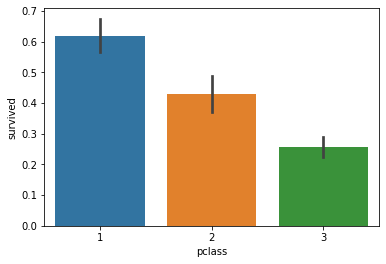

In [13]:
sns.barplot(x='pclass', y='survived', data=df)

plt.savefig('../img/PassengerClassAndSurvival.png')
plt.show()

* Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

### Missing Values

* Cabin (687), 
* Embarked (2) and 
* Age (177)
* Fare (1)

#### Fare -
Passengerid 1226 has an NA Fare value.

In [14]:
df.iloc[1225]

passengerid                  1226
pclass                          3
survived                        0
name           Storey, Mr. Thomas
sex                          male
age                          60.5
sibsp                           0
parch                           0
ticket                       3701
fare                          NaN
cabin                         NaN
embarked                        S
boat                          NaN
body                          261
home.dest                     NaN
Title                          Mr
relatives                       0
not_alone                       1
Name: 1225, dtype: object

* Mr.Storey is a third class passenger who embarked from Southampton (‘S’). Let’s visualize Fares among all others sharing their class and embarkment (n = 494).

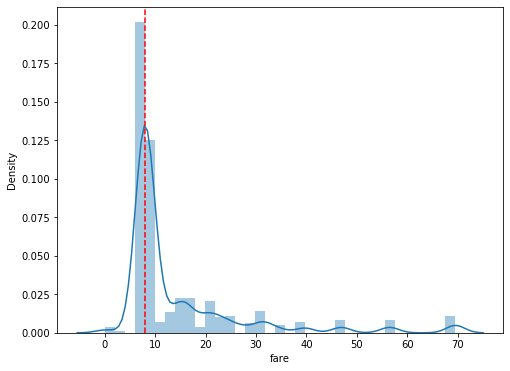

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
distp = sns.distplot(df.loc[(df.pclass == 3) & (df.embarked == 'S'),'fare'])
line = ax.axvline(x=np.nanmedian(df.loc[(df.pclass == 3) & (df.embarked == 'S'),'fare']),color='r', linestyle='--')
plt.ylabel('Density')


plt.savefig('../img/FarePlot')
plt.show()

* the visualization shows that the fare would be somewhere greater than 7 and less than 10, this adds another filter to calculate mean. post appling all three filters we get the mean of 8.03. Which will be replaced by nan value in Mr.Storey's fare!

In [16]:
df.iloc[1225,9] = 8.03

#### Embarked - 
* Passengers with passengerId 62 and 830 are missing Embarkment
* Known information - passenger class and fare. We see that they paid 80 and their classes are 1. So from where did they embark?

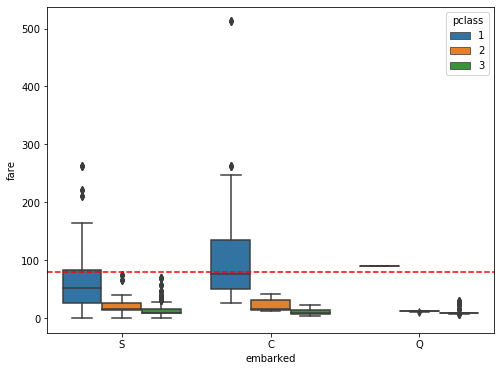

In [17]:
# Get rid of our missing passenger IDs

embark_fare = df[(df.passengerid!=62) & (df.passengerid != 830)]
fig,ax = plt.subplots(figsize=(8,6))
b = sns.boxplot(x='embarked',y='fare',hue='pclass',data=df)
line = ax.axhline(y=80, color='r', linestyle='--')

plt.savefig('../img/MissingEmbarkment.png')
plt.show()

* The median fare for a first class passenger departing from Charbourg (‘C’) coincides nicely with the $80 paid by our embarkment-deficient passengers. I think we can safely replace the NA values with ‘C’.

In [18]:
# Since their fare was $80 for 1st class, they most likely embarked from 'C'
df.loc[[62,829],'embarked'] = 'C'

#### Age - will be imputed by using SimpleImputer. It is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset.

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np
from matplotlib import pyplot as plt 

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df['age'].values.reshape(-1, 1))
df['age'] = imp_mean.transform(df['age'].values.reshape(-1, 1))

#### Cabin - for categorical variable Deck I will populate it with the most frequent item in the column.

In [ ]:
# def Deck(cabin):
#     if not cabin or pd.isnull(cabin):
#         return 'N'
#     else:
#         return cabin[0]

# df['Deck'] = df.cabin.map(Deck)
# #df['Deck'] = df['Deck'].astype(str)

In [ ]:
# imp_freq = SimpleImputer(missing_values='N', strategy='most_frequent')
# imp_freq.fit(df['Deck'].values.reshape(-1, 1))
# df['Deck'] = imp_freq.transform(df['Deck'].values.reshape(-1, 1))

In [ ]:
df.info()

### Converting Features

* convert Age and Fare into int
* categorical features: Title,Sex,Ticket,Deck and Embarked
* dropping unwanted columns passengerid, name, boat, body,home.dest, cabin

In [20]:
df['age'] = df['age'].astype('int64')

In [21]:
df['fare'] = df['fare'].astype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   pclass       1309 non-null   int64  
 2   survived     1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1309 non-null   int64  
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1309 non-null   int64  
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
 15  Title        1309 non-null   object 
 16  relatives    1309 non-null   int64  
 17  not_alone    1309 non-null   int64  
dtypes: float64(1), int64(9), object(8)
memory usage:

#### Deck

In [23]:
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "N": 8}
# data = [df]

# for d in data:
#     d['Deck']=d['Deck'].map(deck)

# df['Deck']

In [24]:
# df['Deck'] = df['Deck'].astype('int64')

#### Titles

In [25]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare_Title": 5}

for d in data:
    d['Title'] = d['Title'].map(titles)

#### Gender

In [26]:
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

#### Ticket

In [27]:
df['ticket'].describe()

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [28]:
df = df.drop(['ticket'], axis=1)

#### Embarked

In [29]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

df['embarked'] = df['embarked'].fillna(0)
df['embarked'] = df['embarked'].astype('int64')

#### Age

In [30]:
data = [df]
for dataset in data:
    
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 6

df['age'].value_counts()

4    442
6    224
3    170
5    139
2    138
1    105
0     91
Name: age, dtype: int64

#### Fare:
* For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [31]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5

df['fare'].value_counts()

0    360
2    325
1    313
3    227
4     67
5     17
Name: fare, dtype: int64

### Prediction

In [32]:
# dropping columns not needed

df = df.drop(['name','cabin','passengerid','boat','body','home.dest'],axis=1)
#df = df.drop(['Deck'],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pclass     1309 non-null   int64
 1   survived   1309 non-null   int64
 2   sex        1309 non-null   int64
 3   age        1309 non-null   int64
 4   sibsp      1309 non-null   int64
 5   parch      1309 non-null   int64
 6   fare       1309 non-null   int64
 7   embarked   1309 non-null   int64
 8   Title      1309 non-null   int64
 9   relatives  1309 non-null   int64
 10  not_alone  1309 non-null   int64
dtypes: int64(11)
memory usage: 112.6 KB


### Feature Selection

In [34]:
X = df.drop('survived',axis=1)
y = df['survived']

[0.12766469 0.29065429 0.1440251  0.03462183 0.02766603 0.10713614
 0.04940427 0.14919296 0.05035712 0.01927757]


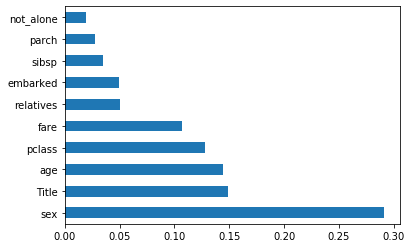

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.savefig('../img/BestFeatures.png')
plt.show()